In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torchvision.io import read_image
from torch.utils.data import DataLoader

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, str(self.img_labels.iloc[idx, 0])+".jpg")
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 2]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

Matplotlib is building the font cache; this may take a moment.


In [63]:
dataset = CustomImageDataset("dataset/styles.csv", "dataset/images/")
dataloader = DataLoader(dataset, batch_size=5, shuffle=True)

Feature batch shape: torch.Size([5, 3, 80, 60])


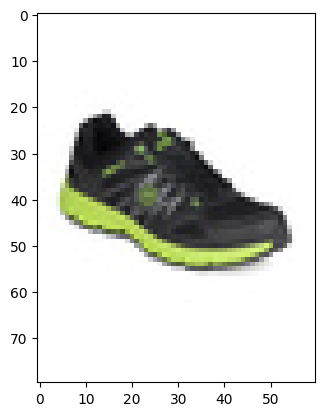

Label: Footwear


In [68]:
# Display image and label.
features, labels = next(iter(dataloader))
print(f"Feature batch shape: {features.size()}")
# print(f"Labels batch shape: {labels.size()}")
img = features[0]#.squeeze()
label = labels[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()
print(f"Label: {label}")

In [69]:
generator = torch.Generator().manual_seed(42)
train_data, val_data, test_data = torch.utils.data.random_split(dataset, [0.7, 0.1, 0.2], generator)

In [70]:
len(train_data)

31097

In [71]:
len(test_data)

8884

In [72]:
data

NameError: name 'data' is not defined